In [ ]:
from charge_noise_tool import *

#!python -m pip install ipympl

In [ ]:
folder = "14-07-09_sweep2D_SDPvsV_SD_1"
data_name = "hallbar_V_SD_1_set_gates_SDP_set.dat"
# folder = "130610"
# data_name = "data.dat"

# Load snapshot information
# into a dataframe (easier to process)
snapshot_json = pd.read_json(f"./data/{folder}/snapshot.json")
snapshot_df = pd.DataFrame(snapshot_json).replace(['#'],[''],regex=True)

# Load CSV into dataframe
data_csv = pd.read_csv(f"./data/{folder}/{data_name}", skiprows=[0,2], sep='\t')
data_df = pd.DataFrame(data_csv)

# Remove artifacts
data_df.columns = data_df.columns.str.replace('[#, ,"]','',regex=True)

In [ ]:
X1 = "SDP"
X2 = "V_SD_1"
Y = "Isd_DC"

VST_sweep = np.unique(np.array(data_df[X1]))
VSD_sweep = np.unique(np.array(data_df[X2]))
ISD_2D = np.rot90(
    np.array(data_df[Y]).reshape(len(VSD_sweep),len(VST_sweep)),0
)

ISD_1D = ISD_2D.T[:,7]
VSD_1D = VSD_sweep[7]

In [ ]:
Palpatine = ChargeNoiseExtractor()

VST_max, G_max = Palpatine.get_VST_for_Gmax(VST_sweep, ISD_1D, VSD=VSD_1D, plot=True)

In [ ]:
Palpatine.get_lever_arms(
    VST_sweep, 
    VSD_sweep, 
    ISD_2D, 
    VST_window=(300., 320.), 
    VSD_window=(140., 800.),
    automated=False
)

In [72]:
import qcodes as qc
from qcodes.dataset import (
    Measurement,
    initialise_or_create_database_at,
    load_or_create_experiment,
    plot_dataset,
)
from qcodes.parameters import Parameter
import numpy as np
import matplotlib.pyplot as plt
db_file_path = './data/Charge Noise/db_20231207-pMOS-e.db'
run_ids = [1,10]
run_ids = [i for i in range(run_ids[0], run_ids[1]+1)]

# run_ids = [1]

qc.initialise_or_create_database_at(db_file_path)
datasets = [qc.load_by_run_spec(captured_run_id=run) for run in run_ids]
params = datasets[0].parameters.split(',')
xname,zname = params
# print(xName, xUnit)
x = np.array([datasets[index].get_parameter_data(xname)[xname][xname] for index in range(len(datasets))])
print(x.flatten())
currents = np.array([datasets[index].get_parameter_data('digitizer_Idc_py')['digitizer_Idc_py']['digitizer_Idc_py'] for index in range(len(datasets))])
print(currents[0])
# avg_currents = np.mean(currents,axis=0)
# plt.plot(avg_currents)
# plt.show()

[0.00000000e+00 4.09600241e-05 8.19200482e-05 ... 6.96319181e+01
 6.96319590e+01 6.96320000e+01]
[1.83105469e-10 1.81884766e-10 1.82495117e-10 ... 3.38745117e-10
 3.40576172e-10 3.40576172e-10]


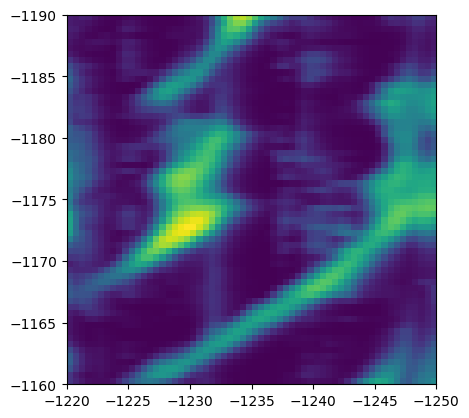

In [55]:
db_file_path = './data/Charge Noise/db_20231207-pMOS-c.db'
run_ids = [3]
# run_ids = [i for i in range(run_ids[0], run_ids[1]+1)]

# run_ids = [1]

qc.initialise_or_create_database_at(db_file_path)
datasets = [qc.load_by_run_spec(captured_run_id=run) for run in run_ids]
params = datasets[0].parameters.split(',')
xname, yname, zname = params
x = np.array([datasets[index].get_parameter_data(xname)[xname][xname] for index in range(len(datasets))])
y = np.array([datasets[index].get_parameter_data(yname)[yname][yname] for index in range(len(datasets))])
z = np.array([datasets[index].get_parameter_data(zname)[zname][zname] for index in range(len(datasets))])

plt.imshow(z[0], extent=[x[0][0],x[0][-1],y[0][0],y[0][-1]])
plt.show()